<a href="https://colab.research.google.com/github/Nada-Elghaweet/Ai-safety-system/blob/CNN_IMGS/OLD_CNN_Saftey_IMGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls /content/

 sample_data  'VIOLENCE VS NON_VIOLENCE.zip'


In [ ]:
import os
os.rename("/content/VIOLENCE VS NON_VIOLENCE.zip", "/content/VIOLENCE_vs_NON_VIOLENCE.zip")
zip_path = "/content/VIOLENCE_vs_NON_VIOLENCE.zip"

In [ ]:
import zipfile
import os
extract_path = '/content/VIOLENCE_vs_NON_VIOLENCE'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
dataset_path = os.path.join(extract_path, 'VIOLENCE VS NON_VIOLENCE')
os.listdir(dataset_path)

['train', 'val', 'test']

In [ ]:
train_path = os.path.join(dataset_path, 'train')
val_path   = os.path.join(dataset_path, 'val')
test_path  = os.path.join(dataset_path, 'test')

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
img_size = (128, 128)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2] ##to simulate diff lighting
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)


test_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

Found 700 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


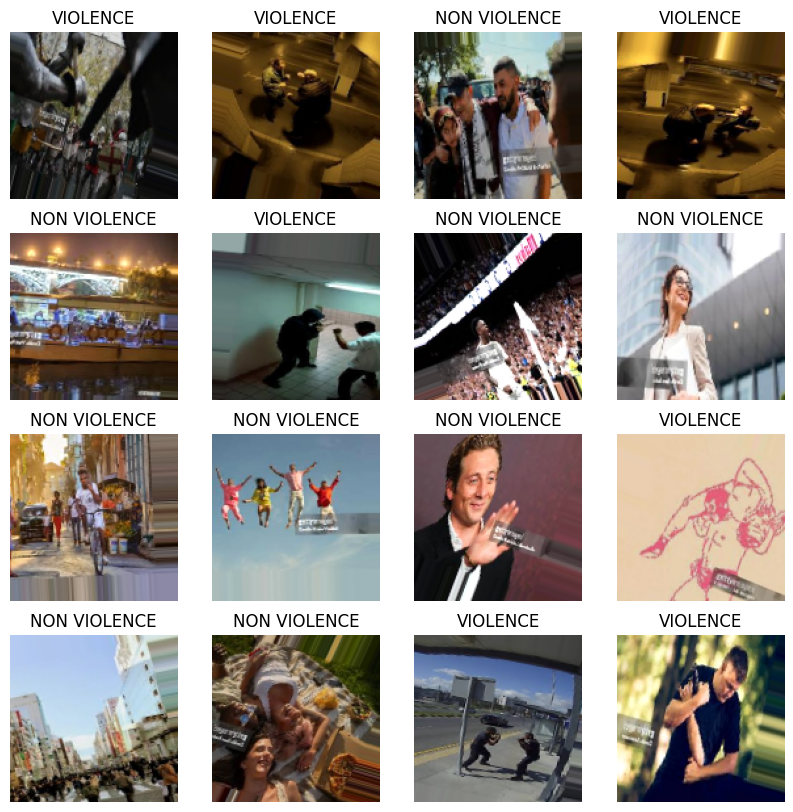

In [ ]:
plt.figure(figsize=(10, 10)) #EDA
for i , (img, label) in enumerate(train_generator):
  for j in range(16):
    ax = plt.subplot(4, 4, j+1)
    plt.imshow(img[j])
    plt.axis('off')
    if label[j] == 1:
      plt.title('VIOLENCE')
    else :
      plt.title('NON VIOLENCE')
  break
plt.show()


In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                 input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.15))

# Block 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,408,641 (32.08 MB)

 Trainable params: 8,408,449 (32.08 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
history = model.fit(train_generator , validation_data= val_generator , epochs= 25)

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.5529 - loss: 3.8694 - val_accuracy: 0.5513 - val_loss: 0.9019
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5285 - loss: 0.9002 - val_accuracy: 0.5128 - val_loss: 0.8433
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5930 - loss: 0.7088 - val_accuracy: 0.5256 - val_loss: 1.0313
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6291 - loss: 0.6678 - val_accuracy: 0.4487 - val_loss: 1.2108
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5690 - loss: 0.6612 - val_accuracy: 0.4359 - val_loss: 1.7258
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6022 - loss: 0.6937 - val_accuracy: 0.4615 - val_loss: 2.5015
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5914 - loss: 0.6701 - val_accuracy: 0.4487 - val_loss: 2.5832
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6143 - loss: 0.6585 - val_accuracy: 0.4936 

Text(0.5, 1.0, 'Loss Curves')

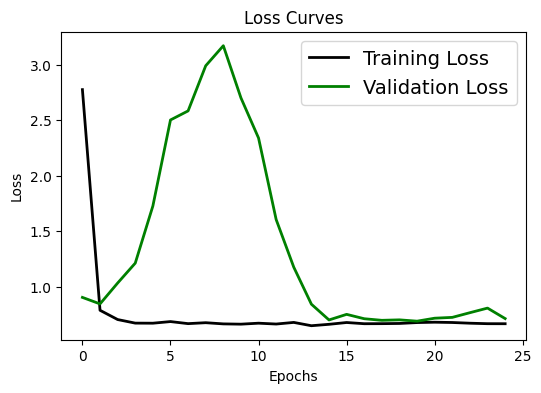

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'] , fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

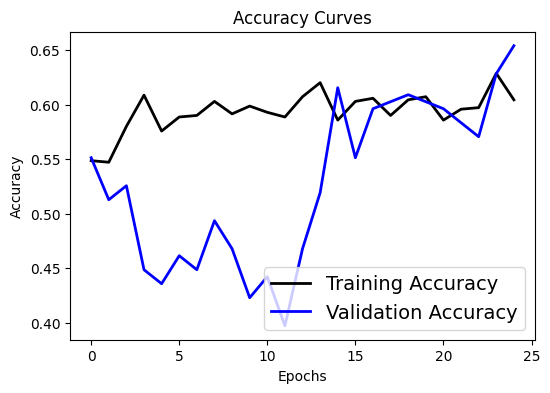

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6307 - loss: 0.7821
Test Loss: 0.9519666433334351
Test Accuracy: 0.6068376302719116
